In [1]:
import torch
import numpy as np
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt


from torchvision import datasets
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression

/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exercise 4.3

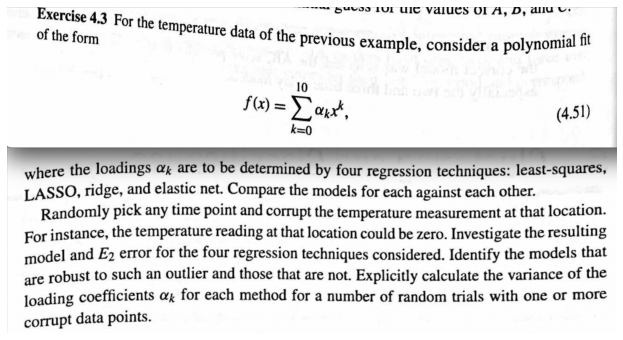

In [2]:
plt.figure(figsize=(15,6))
plt.imshow(plt.imread('./ex4.3.png'))
plt.axis('off');

In [3]:
regressors = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]

def get_data(corruption=None):
    data = pd.DataFrame(list(zip(np.arange(1,25), 
                                 [75,77,76,73,69,68,63,59,57,55,54,52,50,50,49,49,49,50,54,56,59,63,67,72])))
    
    if corruption:
        print('Corrupt the {}-th temperature'.format(corruption))
        data.iloc[corruption, 1] = 0
    else:
        pass
    
    X = pd.DataFrame(np.array([data.iloc[:,0]**k for k in range(11)]).T, 
                         columns=['power {}'.format(i) for i in range(11)])
    y = data.iloc[:,1]
    
    return X, y

In [4]:
X, y = get_data()
X

,power 0,power 1,power 2,power 3,power 4,power 5,power 6,power 7,power 8,power 9,power 10
0,1,1,1,1,1,1,1,1,1,1,1
1,1,2,4,8,16,32,64,128,256,512,1024
2,1,3,9,27,81,243,729,2187,6561,19683,59049
3,1,4,16,64,256,1024,4096,16384,65536,262144,1048576
4,1,5,25,125,625,3125,15625,78125,390625,1953125,9765625
5,1,6,36,216,1296,7776,46656,279936,1679616,10077696,60466176
6,1,7,49,343,2401,16807,117649,823543,5764801,40353607,282475249
7,1,8,64,512,4096,32768,262144,2097152,16777216,134217728,1073741824
8,1,9,81,729,6561,59049,531441,4782969,43046721,387420489,3486784401
9,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000


In [5]:
def get_coefs(regressors, x, y):
    
    names = [model.__class__.__name__ for model in regressors]
    coefs = pd.DataFrame([])
    
    for i,model in enumerate(regressors):
        model.fit(x, y)
        coefs[names[i]] = model.coef_.ravel()
    coefs.set_axis(['power {}'.format(i) for i in range(11)], axis=0, inplace=True)
    
    return coefs

COEFS = get_coefs(regressors, X, y)
COEFS

/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.606e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+01, tolerance: 2.145e-01
  coef_, l1_reg, l2_reg, 

,LinearRegression,Lasso,Ridge,ElasticNet
power 0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
power 1,3.011852e+01,-0.000000e+00,3.242307e-01,-1.934075e-01
power 2,-1.909173e+01,-3.095035e-01,3.705180e-01,-2.980290e-01
power 3,6.358913e+00,9.504506e-03,-7.097320e-02,9.765975e-03
power 4,-1.307210e+00,1.803915e-04,-6.995898e-02,1.665940e-04
power 5,1.700312e-01,1.991129e-06,2.142928e-02,1.608444e-06
power 6,-1.414971e-02,-1.054194e-08,-2.667012e-03,-1.849481e-08
power 7,7.492069e-04,-1.762444e-09,1.782441e-04,-1.822955e-09
power 8,-2.437277e-05,-8.244823e-11,-6.717738e-06,-7.691089e-11
power 9,4.436834e-07,-3.033693e-12,1.347948e-07,-2.580946e-12


In [6]:
def losses(models, X, y, names):
    
    ERRORS = np.array([])
    for model in models:
        ERRORS = np.append(ERRORS, MSE(model.predict(X),y))
        
    return pd.DataFrame(ERRORS.reshape(1,-1), columns=names, index=['MSE'])

train_loss = losses(regressors, X, y, [model.__class__.__name__ for model in regressors])
train_loss

,LinearRegression,Lasso,Ridge,ElasticNet
MSE,0.278192,1.533217,0.36198,1.373144


In [7]:
X1, y1 = get_data(corruption=np.random.choice(range(24)))
y1

Corrupt the 19-th temperature


0     75
1     77
2     76
3     73
4     69
5     68
6     63
7     59
8     57
9     55
10    54
11    52
12    50
13    50
14    49
15    49
16    49
17    50
18    54
19     0
20    59
21    63
22    67
23    72
Name: 1, dtype: int64

In [8]:
COEFS1 = get_coefs(regressors, X1, y1)
COEFS1

/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.287e+03, tolerance: 5.626e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.69621e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/Saizt/opt/anaconda3/envs/UH/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.279e+03, tolerance: 5.626e-01
  coef_, l1_reg, l2_reg, 

,LinearRegression,Lasso,Ridge,ElasticNet
power 0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
power 1,-1.289479e+02,-7.338625e-01,1.065439e+00,-7.702256e-01
power 2,1.029814e+02,-1.562517e-01,1.303564e+00,-1.589399e-01
power 3,-4.037550e+01,5.398889e-03,-1.280380e+00,5.866954e-03
power 4,8.907997e+00,-2.062520e-05,3.744335e-01,-2.907141e-05
power 5,-1.195071e+00,-2.301744e-06,-5.621517e-02,-2.508604e-06
power 6,1.009207e-01,-7.501433e-09,4.723033e-03,-1.198289e-08
power 7,-5.380032e-03,3.231335e-09,-2.185298e-04,3.179528e-09
power 8,1.753261e-04,1.946152e-10,4.886004e-06,1.963685e-10
power 9,-3.183482e-06,6.692099e-12,-2.575766e-08,6.871152e-12


In [9]:
train_loss1 = losses(regressors, X, y, [model.__class__.__name__ for model in regressors])
train_loss1

,LinearRegression,Lasso,Ridge,ElasticNet
MSE,49.13738,28.644089,46.254649,28.459015


In [10]:
print('How many times the error of each model is different in %')
train_loss1/train_loss

How many times the error of each model is different in %


,LinearRegression,Lasso,Ridge,ElasticNet
MSE,176.631063,18.682347,127.782254,20.725441


Here I wanted to explicitly calulate the variance for different number of corupted values by using LaTeX later

$$Var = $$

# Exercise 4.4

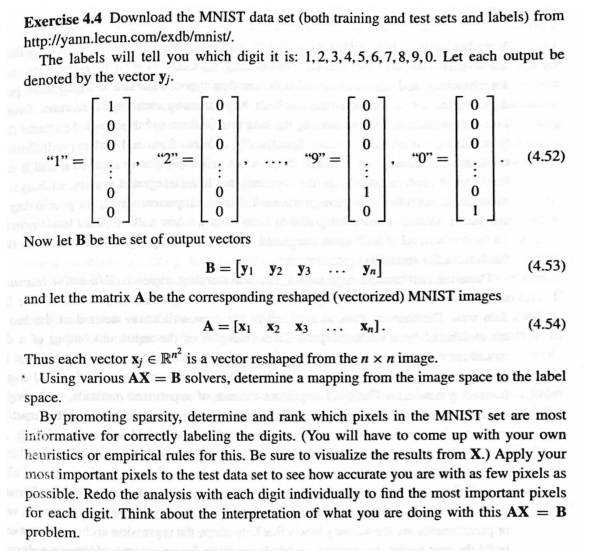

In [11]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('./ex4.4.png'))
plt.axis('off');

In [12]:
dataset = datasets.MNIST(root="dataset/", download=True)

5

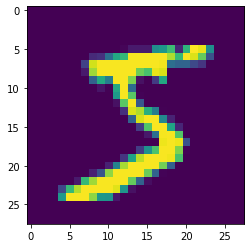

In [68]:
A = dataset.data.reshape(-1,784).T.numpy()
y = dataset.targets.numpy()

plt.imshow(A[:,0].reshape(28,28))
y[0]

In [112]:
B = np.zeros((10, A.shape[1])).T
for j in range(len(B)):
    B[j][y[j]] = y[j]
B = B.T